In [207]:
import pandas as pd
import numpy as np
import seaborn as sns

In [208]:
df= pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/experiment_dataset.csv')

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

In [209]:
print(df)

     Unnamed: 0  Age   Location   Device    Variant  Time Spent       CTR
0             0   62  Location2  Device2    Control   13.928669  0.084776
1             1   18  Location1  Device1  Variant B   11.310518  0.096859
2             2   21  Location2  Device1  Variant B   24.842100  0.097630
3             3   21  Location1  Device3  Variant B   20.061300  0.109783
4             4   57  Location1  Device2  Variant B   34.495503  0.068579
..          ...  ...        ...      ...        ...         ...       ...
995         995   39  Location2  Device2  Variant B   17.252030  0.092211
996         996   38  Location3  Device2    Control   30.075898  0.078151
997         997   60  Location2  Device3    Control   31.929223  0.125213
998         998   35  Location2  Device2  Variant B   14.680299  0.095423
999         999   55  Location1  Device1  Variant B   25.803169  0.166688

[1000 rows x 7 columns]


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [211]:
df.describe(include = 'all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [212]:
df.dtypes

Unnamed: 0      int64
Age             int64
Location       object
Device         object
Variant        object
Time Spent    float64
CTR           float64
dtype: object

In [213]:
grouped_variant = df.groupby('Variant')[['Time Spent', 'CTR']].mean()
print(grouped_variant)

           Time Spent       CTR
Variant                        
Control     20.070781  0.098554
Variant A   24.805547  0.120269
Variant B   23.343783  0.108933


I want to review the sample size for each Variant, Device type and Location:

In [214]:
grouped_variant_size = df.groupby('Variant').size()
print(grouped_variant_size)

Variant
Control      340
Variant A    330
Variant B    330
dtype: int64


In [215]:
grouped_device = df.groupby(['Device', 'Variant']).size()
print(grouped_device)


Device   Variant  
Device1  Control      118
         Variant A    105
         Variant B     93
Device2  Control      103
         Variant A    106
         Variant B    129
Device3  Control      119
         Variant A    119
         Variant B    108
dtype: int64


In [216]:
grouped_location = df.groupby(['Location', 'Variant']).size()
print(grouped_location)


Location   Variant  
Location1  Control      111
           Variant A    102
           Variant B    120
Location2  Control      125
           Variant A    120
           Variant B     98
Location3  Control      104
           Variant A    108
           Variant B    112
dtype: int64


Since the variant samples are pretty evenly divided amongst Devices and Location, I don't see any reason these would cause bias in results, and thus I will simply analyze the Variants based on the entire dataset and not any of these separate data groups.

<Axes: xlabel='Variant', ylabel='Time Spent'>

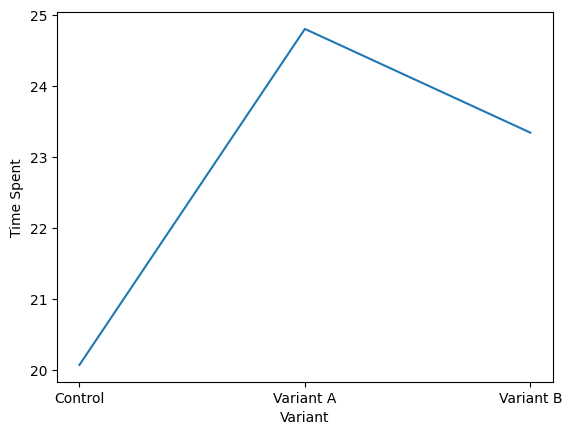

In [217]:
sns.lineplot(data = grouped_variant, x = 'Variant', y = 'Time Spent')

<Axes: xlabel='Variant', ylabel='CTR'>

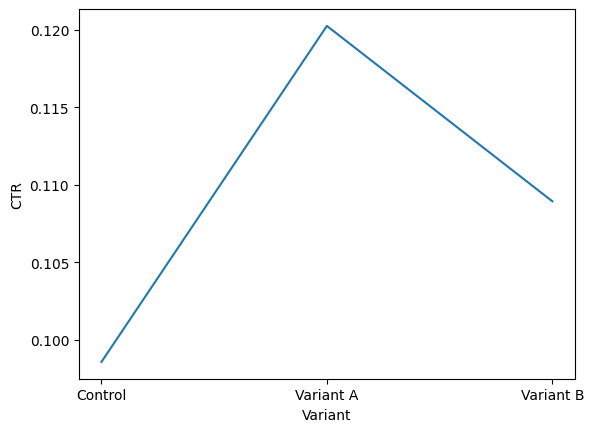

In [218]:
sns.lineplot(data = grouped_variant, x = 'Variant', y = 'CTR')

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

As we can see based on my initial analysis, both Variant A & Variant B have lifted both average Time Spent as well as average CTR. I will now look to run correlation, T-Test & P-value analysis to see if the differences are significant.

I want to be able to conduct numerical calculations with the variants, so I will provide them with a value of 1 when it is a variant and 0 when it is control, calling this column 'Variant Status'. I will also provide them with distinct numeric values of 1 2 and 3 to enable variant specific calculations later in the process if needed, calling this column 'Variant Number'.

In [219]:
df['Variant Status'] = df['Variant'].map({'Control': 0, 'Variant A': 1, 'Variant B': 1})
df['Variant Number'] = df['Variant'].map({'Control': 1, 'Variant A': 2, 'Variant B': 3})

print(df)

correlation_time_spent = df['Variant Status'].corr(df['Time Spent'])
correlation_ctr = df['Variant Status'].corr(df['CTR'])


print('\ncorrelation between variant status and time spent =', correlation_time_spent)
print('correlation between variant status and CTR =', correlation_ctr)


     Unnamed: 0  Age   Location   Device    Variant  Time Spent       CTR   
0             0   62  Location2  Device2    Control   13.928669  0.084776  \
1             1   18  Location1  Device1  Variant B   11.310518  0.096859   
2             2   21  Location2  Device1  Variant B   24.842100  0.097630   
3             3   21  Location1  Device3  Variant B   20.061300  0.109783   
4             4   57  Location1  Device2  Variant B   34.495503  0.068579   
..          ...  ...        ...      ...        ...         ...       ...   
995         995   39  Location2  Device2  Variant B   17.252030  0.092211   
996         996   38  Location3  Device2    Control   30.075898  0.078151   
997         997   60  Location2  Device3    Control   31.929223  0.125213   
998         998   35  Location2  Device2  Variant B   14.680299  0.095423   
999         999   55  Location1  Device1  Variant B   25.803169  0.166688   

     Variant Status  Variant Number  
0                 0               1  

As we can see, there is a weak positive correlation between the control and the variants, signifying that on average, when it's a variant, the user tends to spend more time and click more often. I would now like to analyze the variants independently from one another and conduct t-test and p-value tests to see how significant the increases are. 

In [220]:
import scipy.stats as stats

control_time_spent = df[df['Variant'] == 'Control']['Time Spent']
variantA_time_spent = df[df['Variant'] == 'Variant A']['Time Spent']
variantB_time_spent = df[df['Variant'] == 'Variant B']['Time Spent']

t_statistic, p_value = stats.ttest_ind(control_time_spent, variantA_time_spent)
print('Test between control and Variant A Time Spent')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t_statistic, p_value = stats.ttest_ind(control_time_spent, variantB_time_spent)
print('\nTest between control and Variant B Time Spent')
print('t-statistic:', t_statistic)
print('p-value:', p_value)



Test between control and Variant A Time Spent
t-statistic: -12.142363487472364
p-value: 8.488565644996449e-31

Test between control and Variant B Time Spent
t-statistic: -8.174237395991806
p-value: 1.496358076285182e-15


As we can see, compared to both Variant A and Variant B, the average time spent in the control is much lower than that in the variants. The p-value is incredibely small (much lower than 0.05), signifying that the results are significant and are very likely to repeat for both. We can also see that Variant A performs better here than Variant B, with the lower T-Stat and p-value.

In [221]:
control_CTR = df[df['Variant'] == 'Control']['CTR']
variantA_CTR = df[df['Variant'] == 'Variant A']['CTR']
variantB_CTR = df[df['Variant'] == 'Variant B']['CTR']

t_statistic, p_value = stats.ttest_ind(control_CTR, variantA_CTR)
print('Test between control and Variant A CTR')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t_statistic, p_value = stats.ttest_ind(control_CTR, variantB_CTR)
print('\nTest between control and Variant B CTR')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

Test between control and Variant A CTR
t-statistic: -13.829424737499187
p-value: 1.9602781373243157e-38

Test between control and Variant B CTR
t-statistic: -6.4718143491783255
p-value: 1.8743198199982106e-10


Similar to the time spent results, average CTR is much lower in the control group versus that of the Variant A & B groups. The incredibely small p-values (much lower than 0.05) also signify that this is strong evidence against the null-hypothesis, meaning that the variants both result in a statistically significant difference. Again we see that Variant A performs better than Variant B. I want to analyze the two variants against eachother to view exactly how much better Variant A performs then Variant B and if this performance boost is significant.

In [222]:
t_statistic, p_value = stats.ttest_ind(variantA_time_spent, variantB_time_spent)
print('Test between Variant A & B Time Spent')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t_statistic, p_value = stats.ttest_ind(variantA_CTR, variantB_CTR)
print('\n Test between Variant A & B CTR')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

Test between Variant A & B Time Spent
t-statistic: 3.6788175394209075
p-value: 0.0002534771014765265

 Test between Variant A & B CTR
t-statistic: 7.08499696316128
p-value: 3.587180487986577e-12


These results demonstrate that for both Time Spent and CTR, Variant A performs higher on average than Variant B, and both p-values are less than .05 indicating a statistical significant result, which is very likely to repeat with more samples. This means that it's very safe to say Variant A is the better of the two Variants when it comes to Time Spent and CTR as the performance benchmarks.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

As we've seen throughout the analysis and statistical testing, both Variants on average perform better in both Time Spent and CTR then the control. Both result are statistically significant against the null-hypothesis, with p-values far below 0.05. This means that the Variants are very likely to perform better than the control when more samples are taken. Between the two variants, we also saw that Variant A performed on average better than Variant B in both Time Spent and CTR, with the results being statistically significant. This means that it's very likely that Variant A would continue to outperform Variant B in both Time Spent and CTR with more samples. Due to these results, the engineering team should work on deploying Variant A, as it showed the highest average lift for both variables, and the likelyhood of this result reoccuring is statistically significant. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

Depending on the actual content of the Variants themselves, users of Variant B should be quickly moved over to using Variant A to ensure that those users don't become too attached to using Variant B and thus more upset about being pushed to Variant A. Once those users are all on Variant A, Variant B can be dropped. With the control group still in place, the company could continue to monitor the data with a bigger user base on Variant A to ensure there are no issues, and possibly make any minor tweaks or adjustments that could further improve Variant A prior to a full launch. Having the control group in place would make reviewing the effects of any changes much easier. Finally, once the company is sure the Variant A system is able to withstand the full size of the userbase, they should transition the control users over to Variant A. This should all be done as fast as is safetly possible. Assuming the demand on Variant A causes no issues, we already know that the performance improvement of Variant A in terms of Time Spent and CTR is so strong and significant that there is very minimal risk that this improvement won't continue when more users are utilizing it. The transition can thus take place as fast as the Variant A system can handle.